## Разведочный анализ данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных, основные характеристики датасета

In [4]:
# Загрузка данных
data = pd.read_csv('radar_dataset.csv', sep=',')

In [5]:
data.head()

,ais_id,num_profile,ship_length,ship_width,view_angle,distance_to_radar,marine_traffic_class,dimension_class
0,227023300,"[6, 11, 10, 9, 8, 12, 10, 7, 11, 12, 12, 14, 1...",104,22,-140.932090,11599.470782,None,0
1,227321490,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,6,-170.720077,27850.721576,None,2
2,352090000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",175,28,-165.621794,26609.081047,oil_products tanker,3
3,235029369,NaN,12,4,-135.948899,6268.161144,None,2
4,228179700,"[11, 15, 17, 9, 14, 27, 27, 18, 3, 9, 18, 11, ...",30,10,-43.317525,5163.925502,tug,2


In [6]:
data.shape

(500000, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
ais_id                  500000 non-null int64
num_profile             439463 non-null object
ship_length             500000 non-null int64
ship_width              500000 non-null int64
view_angle              500000 non-null float64
distance_to_radar       500000 non-null float64
marine_traffic_class    500000 non-null object
dimension_class         500000 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 30.5+ MB


In [8]:
data.dropna(inplace=True)

In [9]:
# Количество различных судов в выборке
data['ais_id'].nunique()

442

In [10]:
# Типы судов и количество записей соответствующего типа в выборке
data['marine_traffic_class'].value_counts()

None                       130567
crude_oil tanker            62286
oil/chemical_tanker         55696
container_ship              41605
tug                         23164
ro-ro/passenger_ship        21078
general_cargo               18390
hopper_dredger              14098
oil_products tanker         13357
vehicles_carrier             9680
training_ship                7986
passenger_ship               6034
lpg_tanker                   5794
pilot_ship                   4699
trawler                      3339
fishing                      3328
bulk_carrier                 2390
yacht/pleasure_craft         2262
chemical_tanker              2138
sailing_vessel               2084
ro-ro_cargo                  1896
crewboat                     1616
asphalt/bitumen_tanker       1029
tanker                       1026
dry_cargo                     892
ro-ro/container_carrier       786
lh896354                      755
container                     303
high_speed craft              283
rescue/salvage

In [11]:
# Габаритные классы судов и количество записей соответствующего типа в выборке
data['dimension_class'].value_counts()

2    163429
1    114372
0     86918
3     74744
Name: dimension_class, dtype: int64

In [12]:
# Сколько раз различные ais_id встречаются в данных
data['ais_id'].value_counts()

477462300    24051
235092964    14458
325905000     9917
240658000     9768
227023300     8934
             ...  
227052820        2
255805951        2
232015947        1
227270000        1
235078536        1
Name: ais_id, Length: 442, dtype: int64

In [13]:
# Преобразуем данные радарного профиля к числовому типу
data['num_profile'] = data['num_profile'].apply(lambda s: list(s[1:-1].split(', ')))
data['num_profile'] = data['num_profile'].apply(lambda d: [int(el) for el in d])

# Выделим максимальное и минимальное значения
data['num_profile_max'] = data['num_profile'].apply(lambda d: max(d))
data['num_profile_min'] = data['num_profile'].apply(lambda d: min(d))

In [14]:
# Найдем минимальные и максимальные значения в профилях по всему датасету, и посмотрим на распределения этих значений
data['num_profile_min'].min(), data['num_profile_max'].max()

(0, 255)

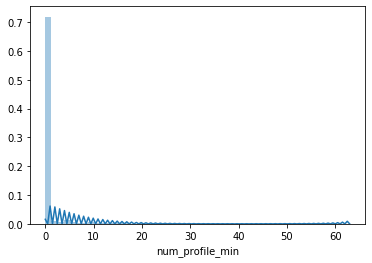

In [15]:
sns.distplot(data['num_profile_min'])

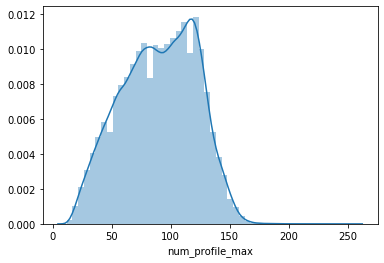

In [16]:
sns.distplot(data['num_profile_max'])

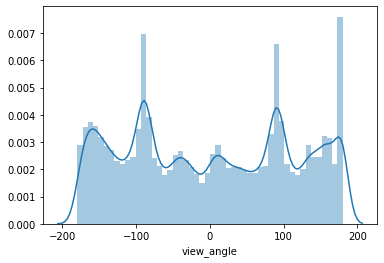

In [17]:
sns.distplot(data['view_angle'])

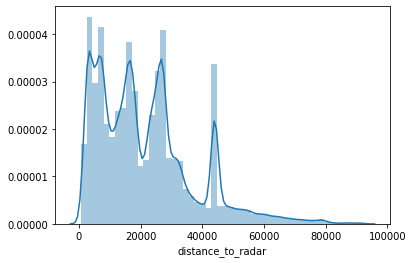

In [18]:
sns.distplot(data['distance_to_radar'])

### Визуализация радарных профилей

Посмотрим на:

1) профили разных судов

2) на профили одного судна под разными углами и на разных расстояниях от радара

In [21]:
# 1

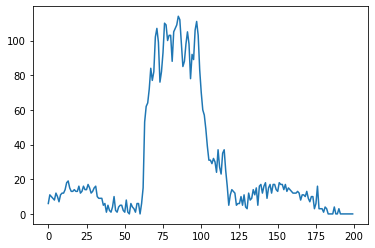

In [22]:
plt.plot(range(len(data['num_profile'][0])), data['num_profile'][0])

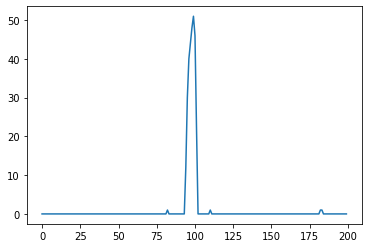

In [23]:
plt.plot(range(len(data['num_profile'][1])), data['num_profile'][1])

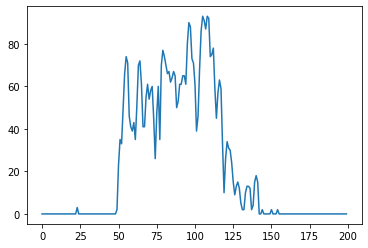

In [24]:
plt.plot(range(len(data['num_profile'][2])), data['num_profile'][2])

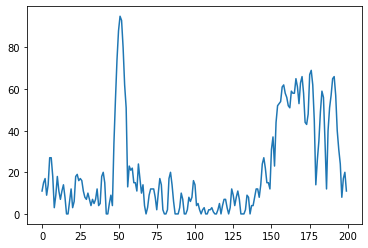

In [25]:
plt.plot(range(len(data['num_profile'][4])), data['num_profile'][4])

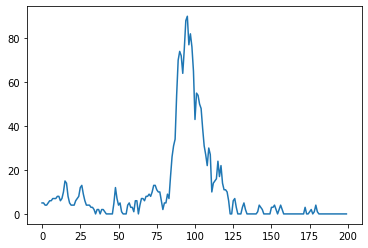

In [26]:
plt.plot(range(len(data['num_profile'][5])), data['num_profile'][5])

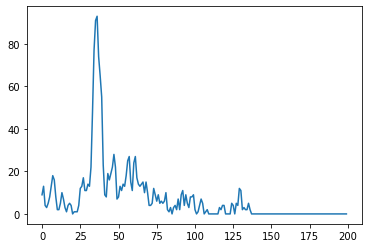

In [27]:
plt.plot(range(len(data['num_profile'][6])), data['num_profile'][6])

In [28]:
# 2. Далее посмотрим на разные профили одного судна, но сначала сгруппируем строки по идентификатору судна, и посмотрим на получившиеся группы

In [29]:
# Сгруппируем строки по ais_id

data_aisid_grouped = data.groupby('ais_id')['ship_length', 'ship_width', 'view_angle', 'distance_to_radar', 'marine_traffic_class', 'dimension_class'].agg(['min','max','nunique'])

In [30]:
data_aisid_grouped

ship_length              ship_width              view_angle  \
                  min  max nunique        min max nunique         min   
ais_id                                                                  
111227501           0   10       2          0   1       2 -178.851823   
205153000          37   37       1          8   8       1 -173.774088   
205155000           9   34       3          0   8       3 -179.882400   
205250990         110  110       1         11  11       1 -179.264729   
205327100          15   15       1          4   4       1  -48.542251   
...               ...  ...     ...        ...  ..     ...         ...   
636018028         349  349       1         45  45       1 -179.995062   
636018210         277  277       1         40  40       1 -169.373964   
636018296         277  277       1         40  40       1 -178.553972   
636092712         185  185       1         30  30       1 -177.812929   
636092801         318  318       1         42  42       1 -178.641575   

                              distance_to_radar                        \
                  max nunique               min           max nunique   
ais_id                                                                  
111227501  179.906303      22      16181.299215  37941.236866      27   
205153000  179.906303     339       2348.374442  17632.794482     350   
205155000  179.906303     619       2323.391735  28143.019246     623   
205250990  179.906303     867       2353.370984   8339.227541     734   
205327100  -34.534307      18      39495.161231  41019.106347      18   
...               ...     ...               ...           ...     ...   
636018028  179.906303     950       2573.218804  67016.111077     965   
636018210  179.906303     961       5356.292345  56083.678567     994   
636018296  179.906303      71       4157.122417  16268.738689      73   
636092712  179.906303     464       2937.966323  71210.707554     458   
636092801  179.906303     395       4644.285200  55119.346083     417   

          marine_traffic_class                         dimension_class      \
                           min             max nunique             min max   
ais_id                                                                       
111227501           pilot_ship      pilot_ship       1               2   2   
205153000              trawler         trawler       1               2   2   
205155000              trawler         trawler       1               2   2   
205250990                 None            None       1               0   0   
205327100       sailing_vessel  sailing_vessel       1               2   2   
...                        ...             ...     ...             ...  ..   
636018028       container_ship  container_ship       1               1   1   
636018210       container_ship  container_ship       1               1   1   
636018296       container_ship  container_ship       1               1   1   
636092712       container_ship  container_ship       1               3   3   
636092801                 None            None       1               1   1   

                   
          nunique  
ais_id             
111227501       1  
205153000       1  
205155000       1  
205250990       1  
205327100       1  
...           ...  
636018028       1  
636018210       1  
636018296       1  
636092712       1  
636092801       1  

[442 rows x 18 columns]

In [31]:
# Посмотрим, совпадают ли габариты одного и того же судна в разных записях

data_aisid_grouped[('ship_length','nunique')].value_counts()

1    395
3     28
2     15
4      4
Name: (ship_length, nunique), dtype: int64

In [32]:
data_aisid_grouped[('ship_width','nunique')].value_counts()

1    394
2     31
3     17
Name: (ship_width, nunique), dtype: int64

In [33]:
# Видно, что совпадают не всегда. Нужно разобраться с причинами расхождений, но пока можно просто исключить такие суда из рассмотрения, т.к. с этими записями что-то не так

In [34]:
# Однако тип у судна всегда один - тут все в порядке
data_aisid_grouped[('marine_traffic_class','nunique')].value_counts()

1    442
Name: (marine_traffic_class, nunique), dtype: int64

In [35]:
# По габаритным классам встречаются расхождения. Ожидаемо, т.к. есть расхождения по размерам
data_aisid_grouped[('dimension_class','nunique')].value_counts()

1    432
2     10
Name: (dimension_class, nunique), dtype: int64

In [36]:
# Посмотрим, как выглядит профиль одного и того же судна под разными углами и с разных расстояний
data_with_type = data[data['marine_traffic_class']!='None']
data_with_type.head()

,ais_id,num_profile,ship_length,ship_width,view_angle,distance_to_radar,marine_traffic_class,dimension_class,num_profile_max,num_profile_min
2,352090000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",175,28,-165.621794,26609.081047,oil_products tanker,3,93,0
4,228179700,"[11, 15, 17, 9, 14, 27, 27, 18, 3, 9, 18, 11, ...",30,10,-43.317525,5163.925502,tug,2,95,0
5,227023200,"[5, 5, 4, 4, 5, 6, 6, 7, 7, 7, 8, 8, 6, 7, 10,...",37,10,131.641740,2655.661736,tug,2,90,0
6,235064008,"[9, 13, 4, 3, 5, 8, 13, 18, 16, 8, 2, 2, 5, 10...",19,4,-87.530959,15204.475378,yacht/pleasure_craft,2,93,0
10,352090000,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, ...",175,28,-165.604741,26581.600069,oil_products tanker,3,78,0


In [37]:
data_id352090000 = data[data['ais_id']==352090000].reset_index()

In [38]:
data_id352090000

,index,ais_id,num_profile,ship_length,ship_width,view_angle,distance_to_radar,marine_traffic_class,dimension_class,num_profile_max,num_profile_min
0,2,352090000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",175,28,-165.621794,26609.081047,oil_products tanker,3,93,0
1,10,352090000,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, ...",175,28,-165.604741,26581.600069,oil_products tanker,3,78,0
2,18,352090000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",175,28,-165.165486,26554.119092,oil_products tanker,3,89,0
3,27,352090000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",175,28,-170.164568,26524.139843,oil_products tanker,3,97,0
4,34,352090000,"[10, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 9, 2, 0, 0,...",175,28,-171.147440,26494.160595,oil_products tanker,3,48,0
...,...,...,...,...,...,...,...,...,...,...,...
998,146428,352090000,"[4, 10, 14, 16, 13, 15, 13, 13, 13, 10, 10, 7,...",175,28,24.367852,33816.591968,oil_products tanker,3,130,0
999,146433,352090000,"[13, 5, 12, 13, 18, 18, 19, 21, 18, 21, 17, 17...",175,28,5.436337,33854.066028,oil_products tanker,3,136,0
1000,146437,352090000,"[10, 14, 20, 15, 13, 19, 11, 9, 9, 11, 5, 8, 4...",175,28,5.430799,33899.034900,oil_products tanker,3,130,0
1001,146443,352090000,"[10, 11, 4, 4, 7, 0, 0, 0, 3, 3, 4, 1, 4, 5, 0...",175,28,43.985408,33936.508961,oil_products tanker,3,126,0


In [39]:
import numpy as np
def visualize_profile(data, ind_list, plot_size=(0, 0), ncols=3):
    if ncols > len(ind_list):
        ncols = len(ind_list)
    nrows = int(np.ceil(len(ind_list) / ncols))
    if plot_size == (0, 0):
        plot_size = (10 * nrows, 5 * ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=plot_size)
    for idx, f in enumerate(ind_list):
        if nrows == 1:
            ax = axes[idx % ncols]
        else:
            ax = axes[idx // ncols, idx % ncols]
            axes[idx // ncols, idx % ncols].set_xlabel(f)
        title = 'Angle: {}, Distance: {}'.format(round(data['view_angle'][f],0), round(data['distance_to_radar'][f], 0))
        ax.set_title(title)
        sns.lineplot(range(len(data['num_profile'][f])), data['num_profile'][f], ax=ax)
        
    return

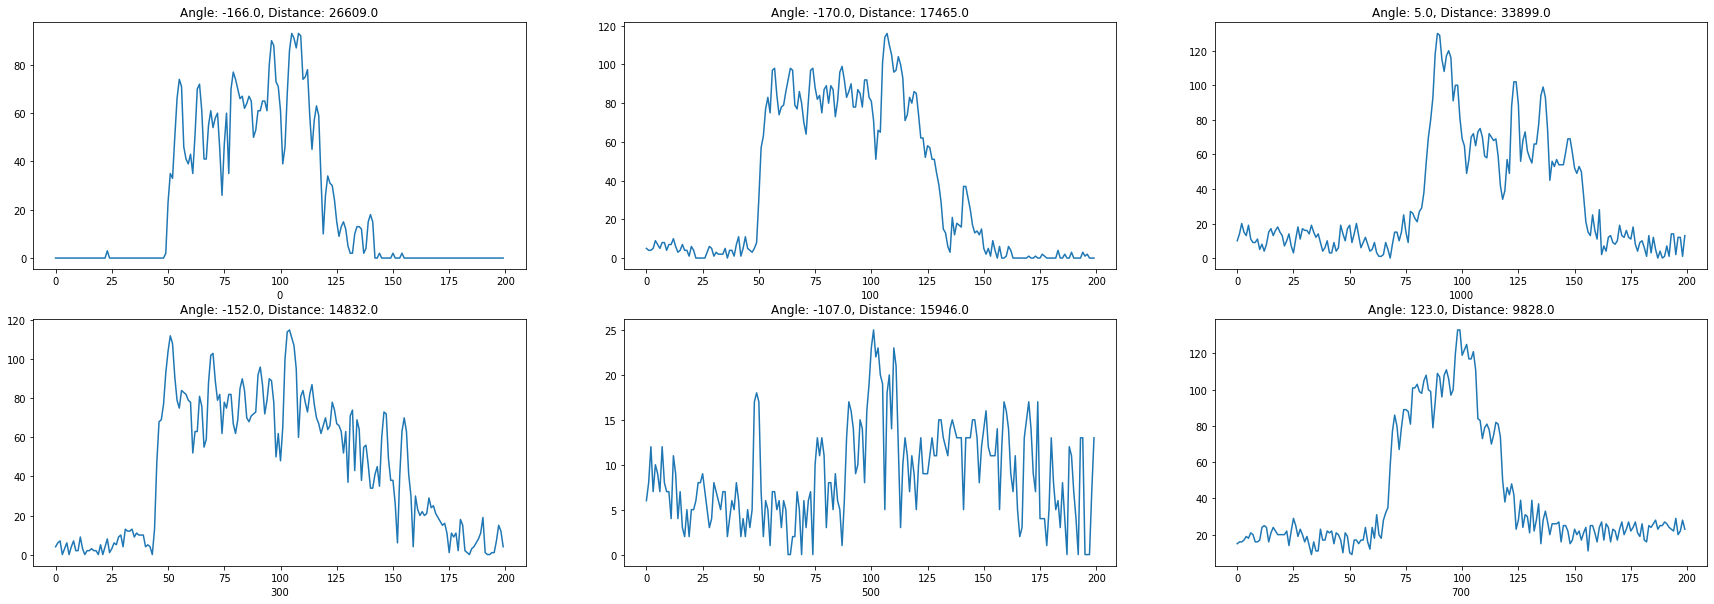

In [40]:
visualize_profile(data_id352090000, [0,100,1000,300,500,700], plot_size=(30, 10), ncols=3)

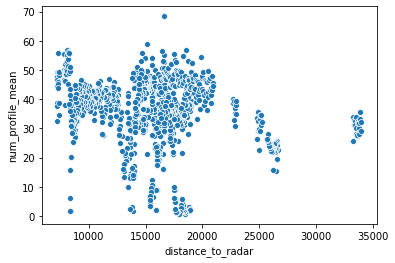

In [41]:
# Посмотрим как изменяется среднее значение радарного профиля в зависимости от расстояния

data_id352090000['num_profile_mean'] = data_id352090000['num_profile'].apply(lambda d: np.mean(d))

sns.scatterplot(x='distance_to_radar', y='num_profile_mean', data=data_id352090000)

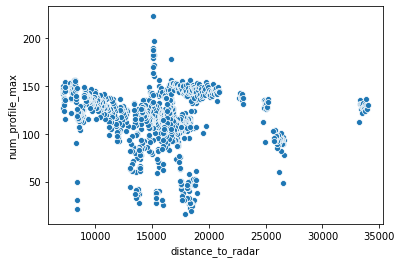

In [42]:
# Посмотрим как изменяется максимальное значение радарного профиля в зависимости от расстояния

sns.scatterplot(x='distance_to_radar', y='num_profile_max', data=data_id352090000)

In [45]:
# Четкой и понятной зависимости не наблюдается

In [48]:
# Построим приближительную проекцию профиля на ось, направленную вдоль судна

data_id352090000['num_profile_projected'] = data_id352090000[['num_profile','view_angle','distance_to_radar']].apply(lambda row: [el*np.sin(np.deg2rad(row[1])) for el in row[0]], axis=1)


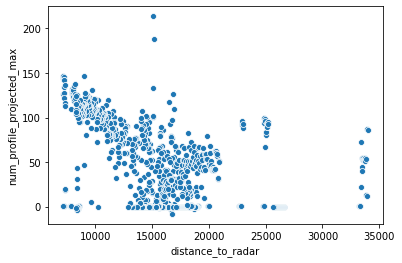

In [49]:
data_id352090000['num_profile_projected_max'] = data_id352090000['num_profile_projected'].apply(lambda d: np.max(d))

sns.scatterplot(x='distance_to_radar', y='num_profile_projected_max', data=data_id352090000)

In [50]:
data_id352090000[['distance_to_radar','num_profile_projected_max']].corr()

,distance_to_radar,num_profile_projected_max
distance_to_radar,1.000000,-0.415989
num_profile_projected_max,-0.415989,1.000000


In [51]:
data_id352090000[['view_angle','num_profile_projected_max']].corr()

,view_angle,num_profile_projected_max
view_angle,1.000000,0.572264
num_profile_projected_max,0.572264,1.000000


In [54]:
data_id352090000['num_profile_projected_mean'] = data_id352090000['num_profile_projected'].apply(lambda d: np.mean(d))
data_id352090000[['distance_to_radar','num_profile_projected_mean']].corr()

,distance_to_radar,num_profile_projected_mean
distance_to_radar,1.000000,-0.344027
num_profile_projected_mean,-0.344027,1.000000


In [55]:
data_id352090000[['view_angle','num_profile_projected_mean']].corr()

,view_angle,num_profile_projected_mean
view_angle,1.000000,0.688633
num_profile_projected_mean,0.688633,1.000000


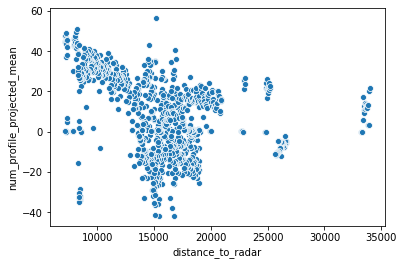

In [56]:
sns.scatterplot(x='distance_to_radar', y='num_profile_projected_mean', data=data_id352090000)

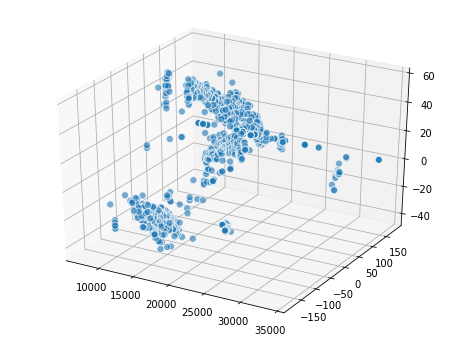

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data_id352090000['distance_to_radar']
ys = data_id352090000['view_angle']
zs = data_id352090000['num_profile_projected_mean']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
plt.show()

In [ ]:
# Вроде бы есть тенденция к снижению среднего значения с увеличением расстояния от радара, но довольно размытая

### Визуализация пиков профилей. Они пригодятся для формирования набора признаков

In [61]:
from scipy.signal import find_peaks
def show_peaks(data, height=0):
    x = np.array(data)
    peaks, _ = find_peaks(x, height=height)
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")
    plt.plot(np.zeros_like(x), "--", color="gray")
    plt.show()

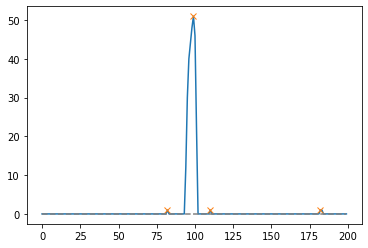

In [62]:
show_peaks(data['num_profile'][1])

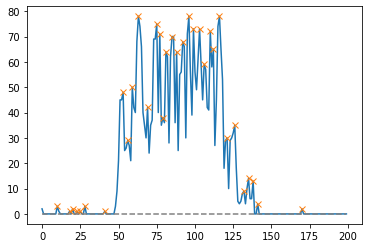

In [63]:
show_peaks(data['num_profile'][10])

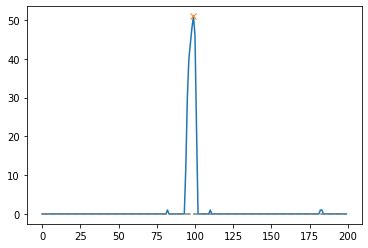

In [65]:
# Отфильтруем пики ниже значения 5
show_peaks(data['num_profile'][1], 5)

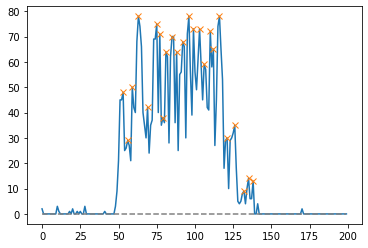

In [66]:
show_peaks(data['num_profile'][10], 5)